In [490]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [491]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [492]:
data_path = r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\preprocessed_day.csv"
df = pd.read_csv(data_path, encoding= 'unicode_escape')

In [493]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekend,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.805833,0.160446,985,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,0,0,0,0.363478,0.696087,0.248539,801,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,1,0.196364,0.437273,0.248309,1349,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,0.200000,0.590435,0.160296,1562,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,1,0.226957,0.436957,0.186900,1600,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [494]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [495]:
# Creating a dependent variable for rented bike count
dependent_variable = 'cnt'

In [496]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['mnth_10',
 'weekday_3',
 'season_2',
 'mnth_12',
 'season_4',
 'windspeed',
 'weekday_6',
 'workingday',
 'weekday_5',
 'mnth_9',
 'temp',
 'weathersit_2',
 'weekend',
 'weathersit_3',
 'weekday_2',
 'mnth_3',
 'mnth_6',
 'mnth_4',
 'mnth_7',
 'season_3',
 'weekday_1',
 'yr',
 'mnth_2',
 'mnth_5',
 'mnth_8',
 'holiday',
 'weekday_4',
 'hum',
 'mnth_11']

In [497]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [498]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [499]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 29)
(584,)
(147, 29)
(147,)


In [500]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [501]:

import joblib
import os

# Path to your existing folder
folder_path = "D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"   # <-- change if needed

# Make sure the folder exists (does NOT create a new one if already exists)
os.makedirs(folder_path, exist_ok=True)

# Full path of the scaler file
scaler_path = os.path.join(folder_path, "scaler.pkl")

# Save scaler
joblib.dump(scaler, scaler_path)

print(f"Scaler saved at: {scaler_path}")


Scaler saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\scaler.pkl


In [502]:
# Fit on train numeric columns
X_train = scaler.fit_transform(X_train)

# Transform test numeric columns
X_test = scaler.transform(X_test)

In [503]:
X_train[0:10]

array([[-0.99317398, -0.16783627,  0.66749124, -0.84514833,  1.51736496,
         0.49077526, -0.62488094,  1.68585446, -0.57735027, -0.57735027,
        -0.2819263 , -0.31264095,  3.34165628, -0.31919711, -0.30263639,
        -0.29240701, -0.30263639, -0.27478436, -0.31264095, -0.3093296 ,
        -0.3093296 , -0.40129017, -0.42121177, -0.40987803, -0.40702415,
         2.43975018, -0.40416162,  1.40697969, -0.16236391],
       [ 1.00687293, -0.16783627,  0.66749124,  0.39486284, -0.71638733,
        -0.68939939, -0.62488094,  1.68585446, -0.57735027, -0.57735027,
        -0.2819263 , -0.31264095, -0.2992528 ,  3.13286048, -0.30263639,
        -0.29240701, -0.30263639, -0.27478436, -0.31264095, -0.3093296 ,
        -0.3093296 , -0.40129017, -0.42121177, -0.40987803, -0.40702415,
         2.43975018, -0.40416162, -0.71074232, -0.16236391],
       [ 1.00687293, -0.16783627,  0.66749124,  0.90172544,  0.70833941,
        -0.94161059, -0.62488094, -0.59317101, -0.57735027,  1.73205081,
  

## Lasso


In [504]:
lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(X_train,y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [505]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "lasso_model.pkl")

# Save the model
joblib.dump(lasso_reg, file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\lasso_model.pkl


In [506]:
lasso_reg.coef_

array([ 7.111914  , -0.39100589,  0.88722643,  8.28566631, -2.3084334 ,
       -1.96496564, -0.        ,  3.19239643,  3.28339222,  5.89071523,
        0.45085682,  1.35672482,  0.68454771,  1.41170496,  0.07088067,
       -0.96700723, -0.        ,  1.32670462,  0.61227004, -0.08635364,
        0.02742889, -0.2717274 ,  0.        , -0.05361736,  0.12224304,
        0.2826731 ,  0.73919563, -1.1059333 , -3.00477101])

In [507]:
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
yr,7.111914
holiday,-0.391006
workingday,0.887226
temp,8.285666
hum,-2.308433
windspeed,-1.964966
weekend,-0.000000
season_2,3.192396
season_3,3.283392
season_4,5.890715


In [508]:
lasso_reg.intercept_

np.float64(65.2413014457131)

In [509]:
lasso_reg.score(X_train,y_train)

0.8397687785673071

In [510]:
y_pred_train = lasso_reg.predict(X_train)
y_pred_lasso = lasso_reg.predict(X_test)

In [511]:
MAE= mean_absolute_error(y_test,y_pred_lasso)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

MSE=mean_squared_error(y_test,y_pred_lasso)
print(f" The Mean Squred Error(MSE) is {MSE}.")

RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2=r2_score(y_test,y_pred_lasso)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 4.859517140796216.
 The Mean Squred Error(MSE) is 40.311190995048065.
The Root Mean Squared Error(RMSE) is 6.349109464724015.
The R2 Score is 0.8580872116745255.
Adjusted R2 is 0.8229122470468437.


In [512]:
test_dict = {'Model':"Lasso",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [513]:
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8595,40.3112,6.3491,0.8581,0.8229


In [514]:
lasso_rg = Lasso()

alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_linear_reg = GridSearchCV(lasso_rg, alphas, scoring='neg_mean_squared_error', cv=4)
 
lasso_linear_reg.fit(X_train, y_train)


,estimator,Lasso()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


In [515]:
print(f'The best alpha value is {lasso_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {lasso_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.1}
The best negative mean squred error value is -45.593666681941876


In [516]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [517]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [518]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

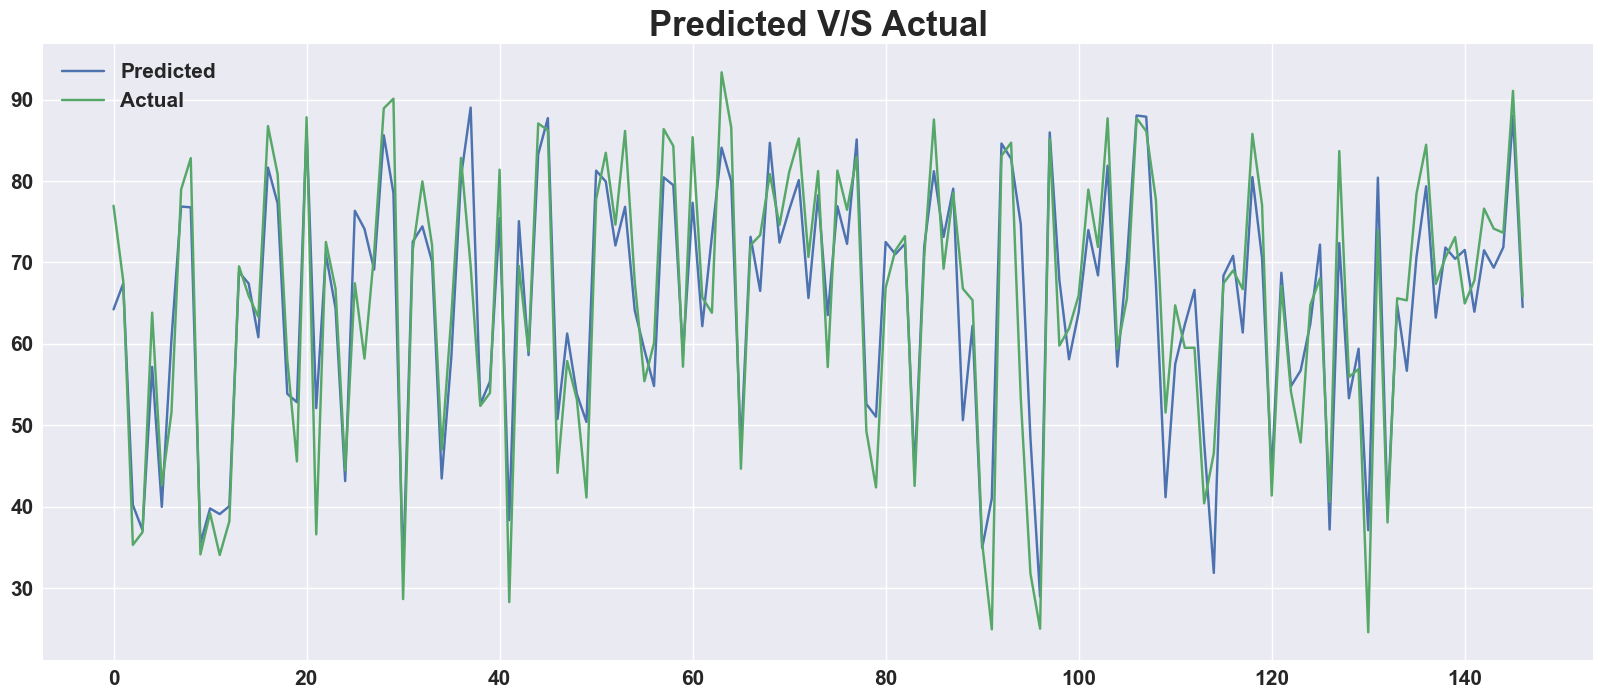

In [519]:
plot_Pred_vs_actual(y_pred_lasso,y_test)

Text(0.5, 0, 'y_predicted')

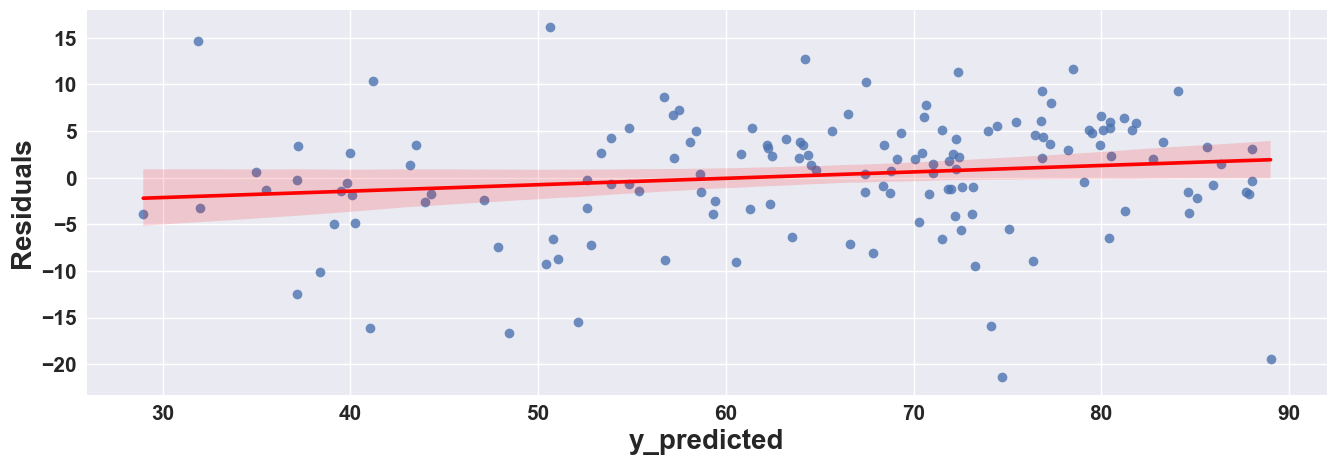

In [520]:
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred_lasso,y = y_test-y_pred_lasso,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

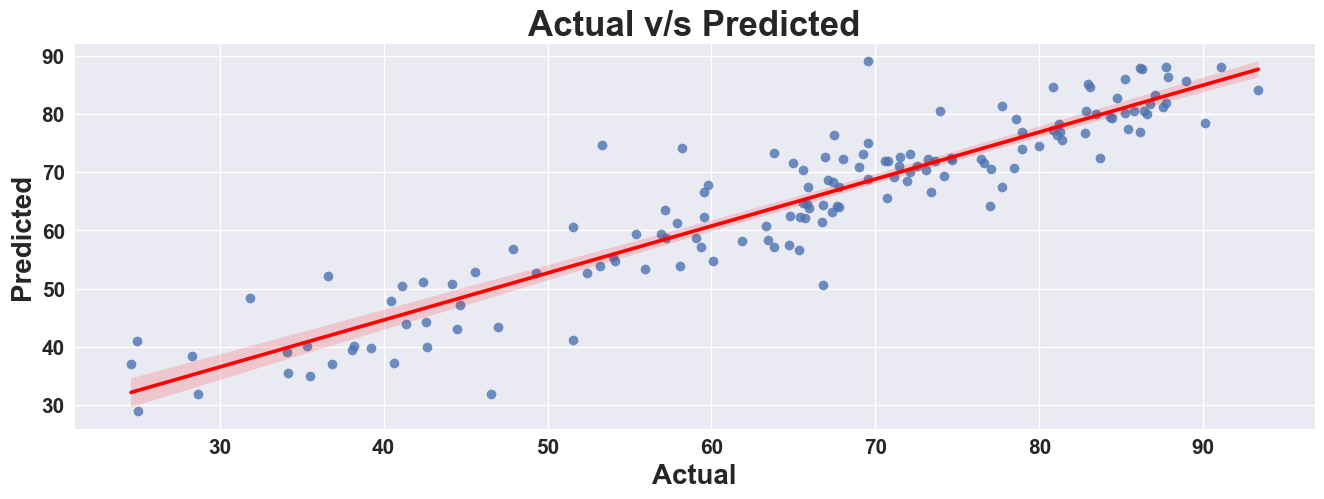

In [521]:
plot_scatter(y_pred_lasso,y_test)

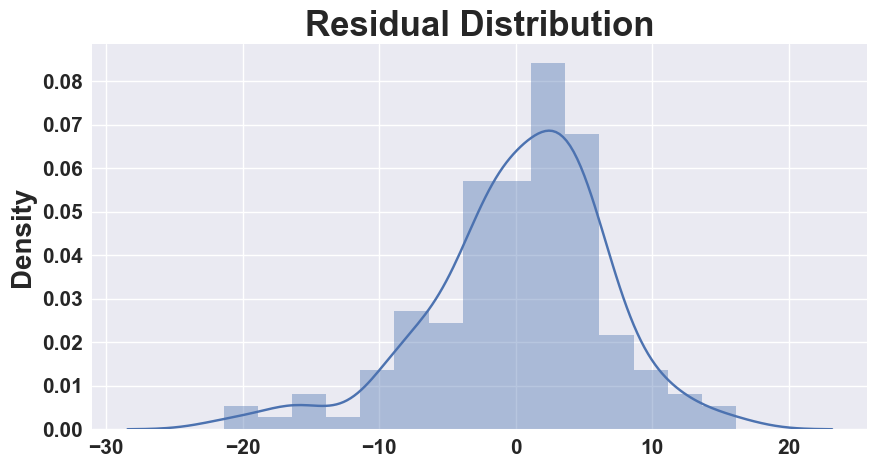

In [522]:
Residual_distPlot(y_pred_lasso,y_test)

# Ridge

In [523]:
# Initiating
ridge_reg = Ridge(alpha = 0.01)

In [524]:
# Fitting and training the model
ridge_reg.fit(X_train,y_train)

,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [525]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "ridge_model.pkl")

# Save the model
joblib.dump(ridge_reg, file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\ridge_model.pkl


In [526]:
# Check coefficient
ridge_reg.coef_

array([ 7.12366059e+00, -5.32222767e-01,  5.00799951e-01,  8.21863443e+00,
       -2.31113561e+00, -1.97571478e+00, -3.21248321e-01,  3.20242655e+00,
        3.39531651e+00,  5.95651948e+00,  5.15790382e-01,  1.43094278e+00,
        7.63959216e-01,  1.50601855e+00,  1.44819011e-01, -9.46595124e-01,
        1.96140961e-02,  1.35801425e+00,  6.59538573e-01, -7.46322712e-02,
        6.87773406e-02, -2.13909402e-01,  7.30650201e-02,  1.71136757e-03,
        1.93094696e-01,  3.53752879e-01,  7.67989542e-01, -1.12164444e+00,
       -3.01517447e+00])

In [527]:
# get dataframe of x columns and Coeficients
pd.DataFrame(ridge_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
yr,7.123661
holiday,-0.532223
workingday,0.500800
temp,8.218634
hum,-2.311136
windspeed,-1.975715
weekend,-0.321248
season_2,3.202427
season_3,3.395317
season_4,5.956519


In [528]:
    # Check intercept
ridge_reg.intercept_

np.float64(65.2413014457131)

In [529]:
# Checking score
ridge_reg.score(X_train,y_train)

0.8397989705828093

In [530]:
# y predictions on training dataset
y_pred_train = ridge_reg.predict(X_train)
# y predictions on test dataset
y_pred_ridge = ridge_reg.predict(X_test)

In [531]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred_ridge)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred_ridge)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred_ridge)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 4.854304123535955.
 The Mean Squred Error(MSE) is 40.16602057793326.
The Root Mean Squared Error(RMSE) is 6.337666808687032.
The R2 Score is 0.858598274190085.
Adjusted R2 is 0.8235499831773712.


In [532]:
test_dict = {'Model':"Ridge(GridsearchCv Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [533]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8595,40.3112,6.3491,0.8581,0.8229
1,Ridge(GridsearchCv Tunned),4.8543,40.1660,6.3377,0.8586,0.8235


In [534]:
# cross validation on Ridge regression
# creating object
ridge_rg = Ridge()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_rg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
ridge_linear_reg.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,5


In [535]:
# Since it showing best parameter alpha= 1.. alpha =1 means it will be as linear regression.
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 5}
The best negative mean squred error value is -45.65291132329172


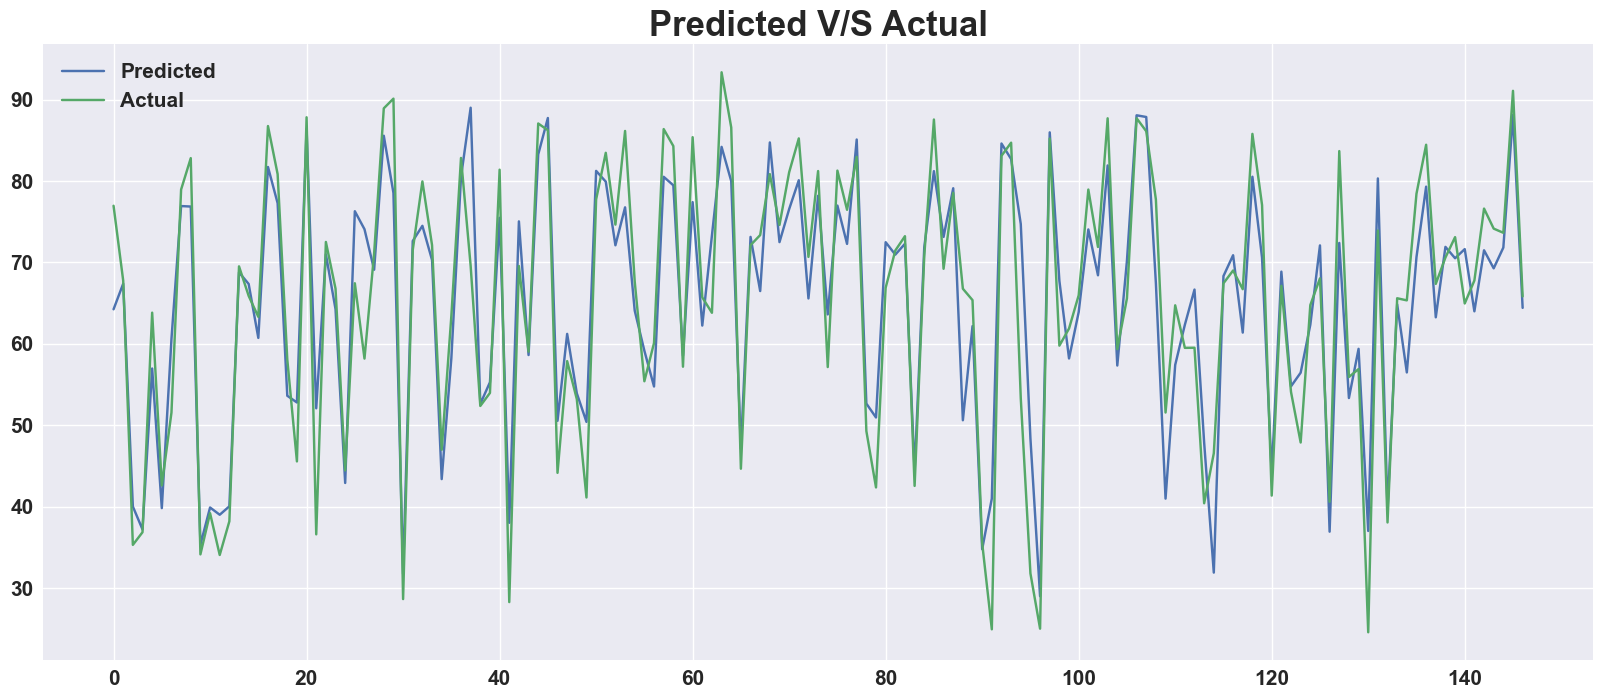

In [536]:
plot_Pred_vs_actual(y_pred_ridge,y_test)

Text(0.5, 0, 'y_predicted')

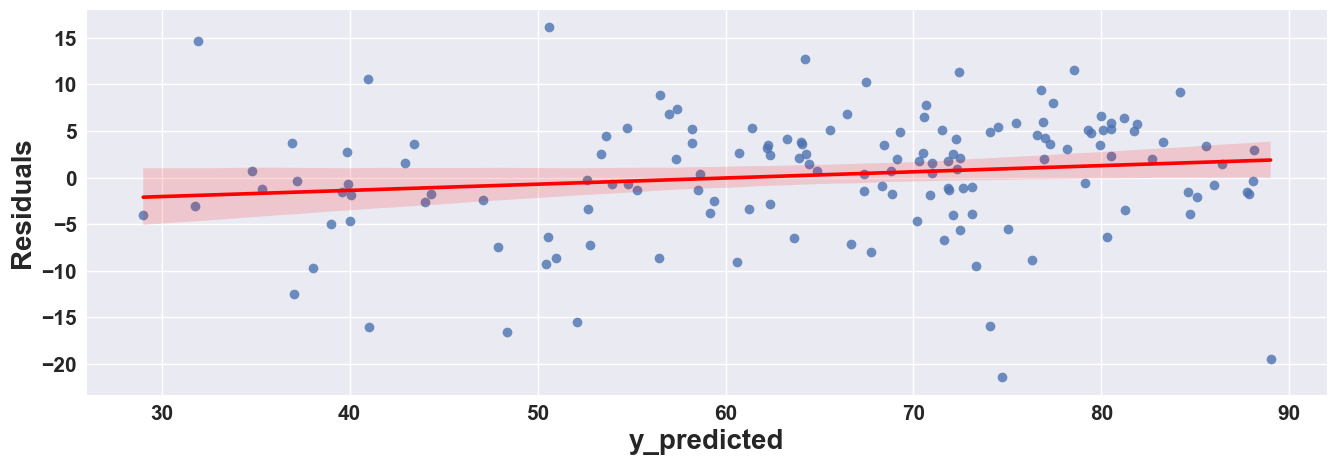

In [537]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_ridge,y=y_test-y_pred_ridge,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

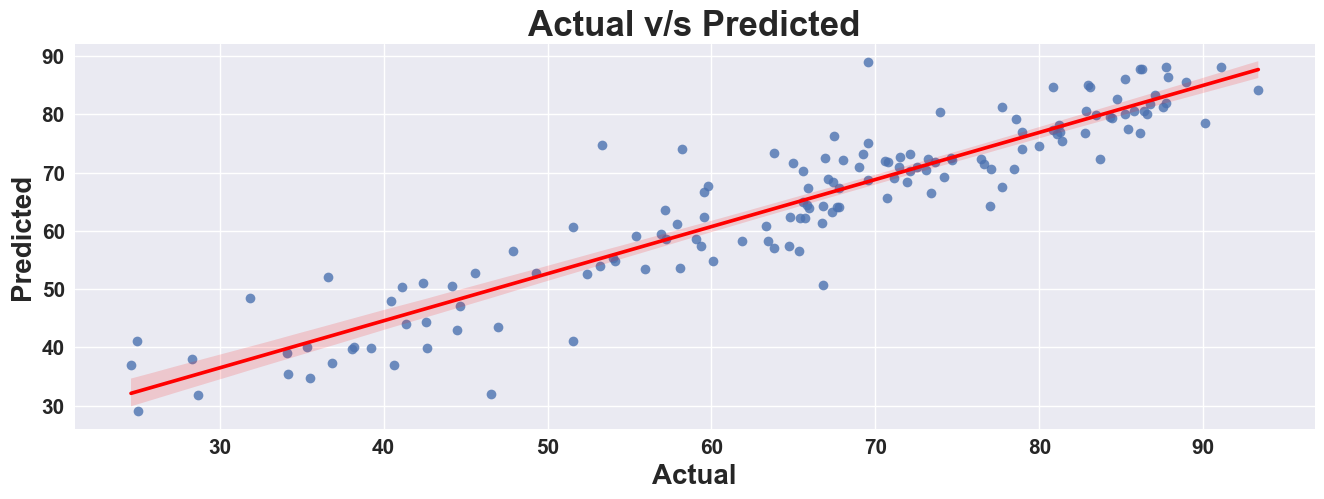

In [538]:
plot_scatter(y_pred_ridge,y_test)

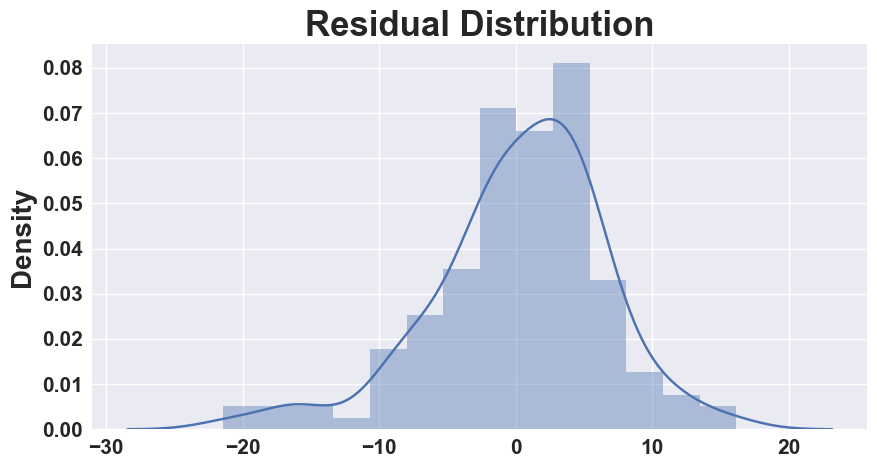

In [539]:
Residual_distPlot(y_pred_ridge,y_test)

# Elastic Net

In [540]:
elastic_net_reg = ElasticNet(alpha = 1e-05,l1_ratio = 0.3)
elastic_net_reg.fit(X_train,y_train)

,alpha,1e-05
,l1_ratio,0.3
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [541]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "elastic_net_model.pkl")

# Save the model
joblib.dump(elastic_net_reg, file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\elastic_net_model.pkl


In [542]:
y_pred_train = elastic_net_reg.predict(X_train)
y_pred_elastic = elastic_net_reg.predict(X_test)

In [543]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

0.8585984971009717

In [544]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_elastic)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_elastic)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_elastic)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.854287079825085.
The Mean Squred Error(MSE) is 40.1659572587396.
The Root Mean Squared Error(RMSE) is 6.337661813219415.
The R2 Score is 0.8585984971009717.
Adjusted R2 is 0.8235502613396741.


In [545]:
test_dict = {'Model':"ElasticNet(GridSearchCV-Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [546]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8595,40.3112,6.3491,0.8581,0.8229
1,Ridge(GridsearchCv Tunned),4.8543,40.1660,6.3377,0.8586,0.8235
2,ElasticNet(GridSearchCV-Tunned),4.8543,40.1660,6.3377,0.8586,0.8236


In [547]:
elastic = ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_regressor.fit(X_train, y_train)

,estimator,ElasticNet()
,param_grid,"{'alpha': [1e-15, 1e-13, ...], 'l1_ratio': [0.1, 0.2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


In [548]:
print(f'The best alpha value is {elastic_regressor.best_params_}')
print(f'The best negative mean squred error value is {elastic_regressor.best_score_}')

The best alpha value is {'alpha': 0.1, 'l1_ratio': 0.9}
The best negative mean squred error value is -45.59773175732413


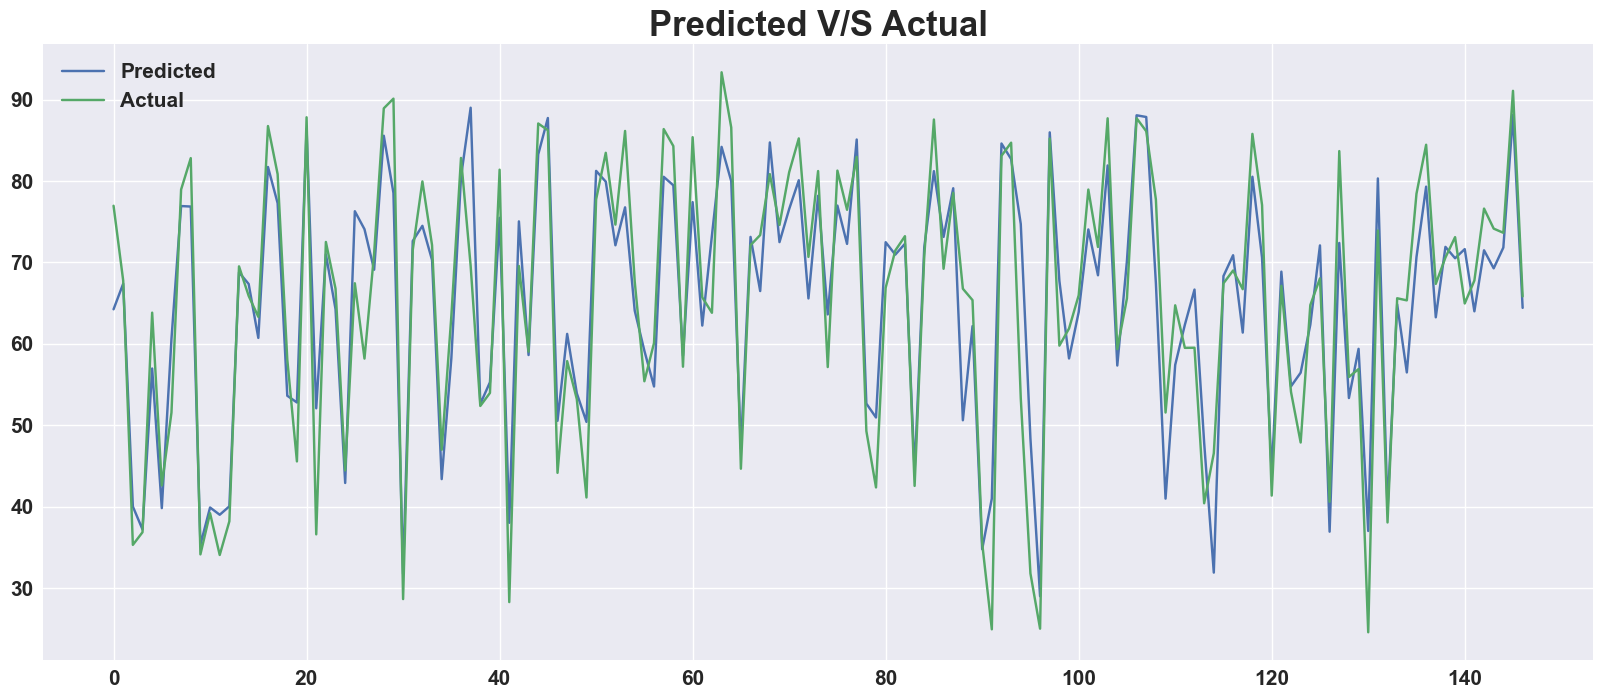

In [549]:
plot_Pred_vs_actual(y_pred_elastic,y_test)

Text(0.5, 0, 'y_predicted')

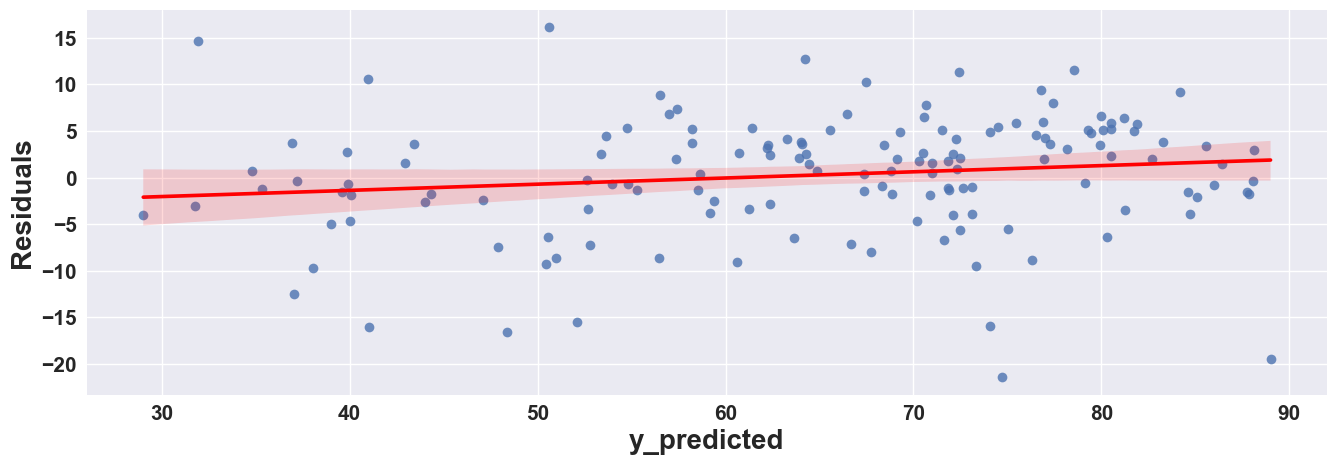

In [550]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_elastic,y=y_test-y_pred_elastic,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

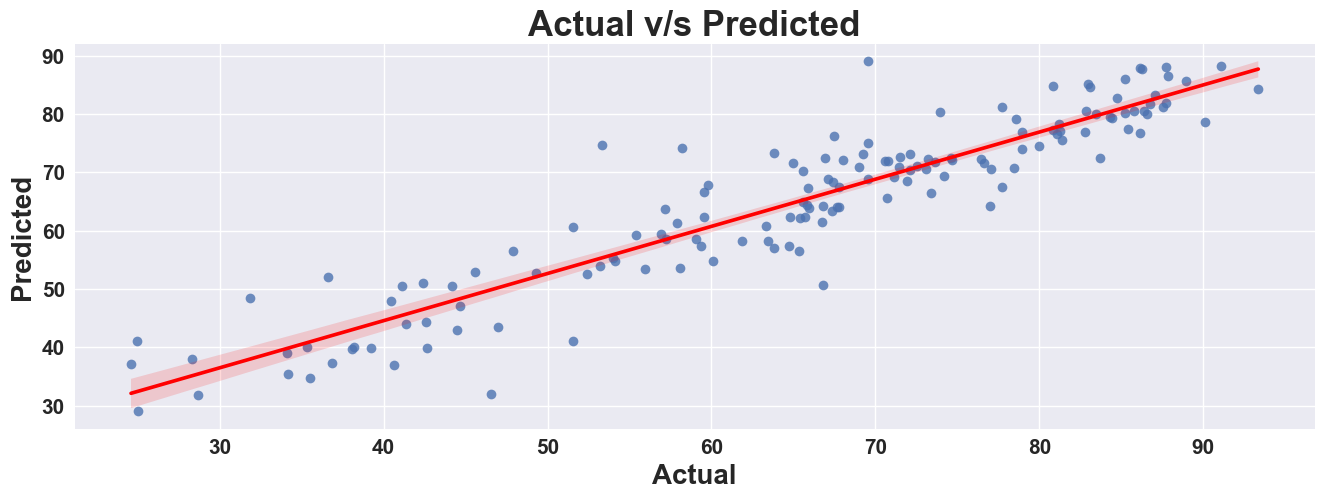

In [551]:
plot_scatter(y_pred_elastic,y_test)

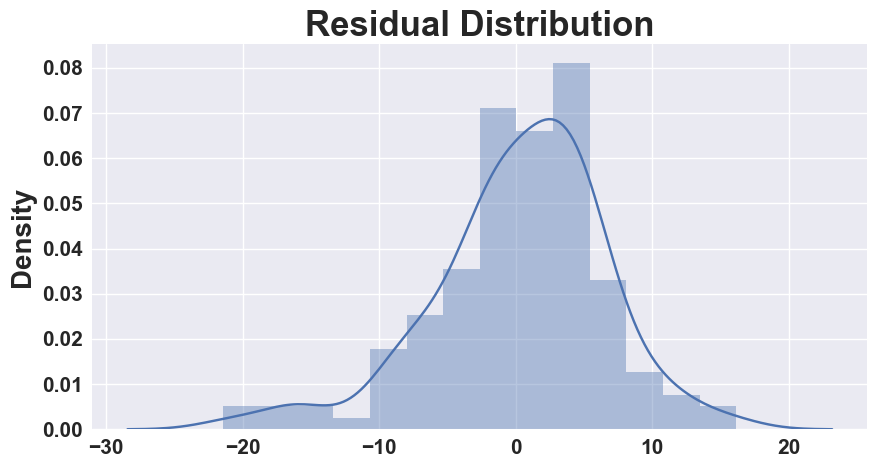

In [552]:
Residual_distPlot(y_pred_elastic,y_test)

### Decision Tree Regressor


In [553]:
D_tree = DecisionTreeRegressor()

D_tree.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [554]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "decision_tree.pkl")

# Save the model
joblib.dump(D_tree,file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\decision_tree.pkl


In [555]:
y_pred_train = D_tree.predict(X_train)
y_pred_tree = D_tree.predict(X_test)

In [556]:
MAE = mean_absolute_error(y_test,y_pred_tree)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred_tree)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred_tree)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_tree))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 5.553384184830199.
The Mean Squred Error(MSE) is 59.712687075936444.
The Root Mean Squared Error(RMSE) is 7.727398467526859.
The R2 Score is 0.7897855728848687.
Adjusted R2 is 0.7376811422324003.


In [557]:
test_dict = {'Model':"Decision Tree Regressor(GridsearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [558]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8595,40.3112,6.3491,0.8581,0.8229
1,Ridge(GridsearchCv Tunned),4.8543,40.1660,6.3377,0.8586,0.8235
2,ElasticNet(GridSearchCV-Tunned),4.8543,40.1660,6.3377,0.8586,0.8236
3,Decision Tree Regressor(GridsearchCV),5.5534,59.7127,7.7274,0.7898,0.7377


In [559]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [560]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [561]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

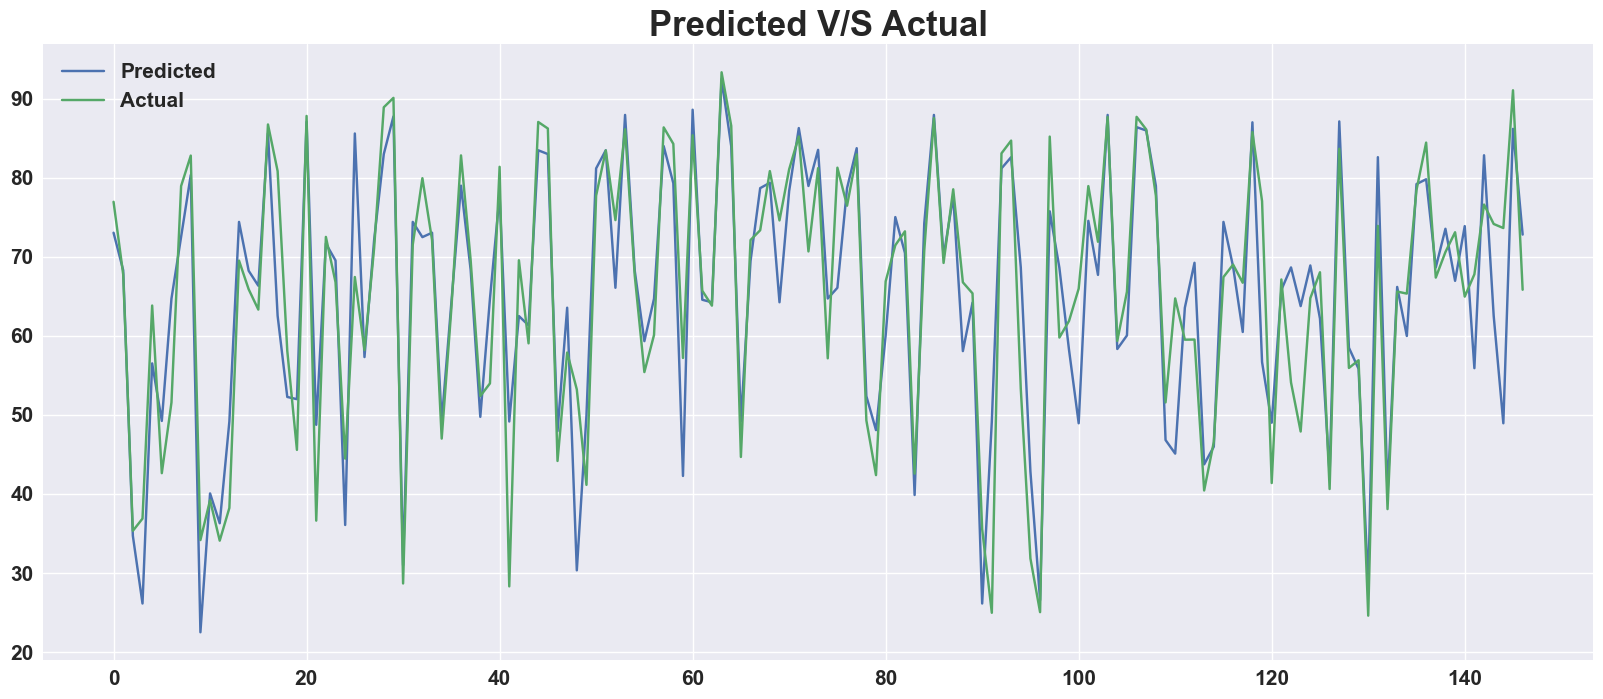

In [562]:
plot_Pred_vs_actual(y_pred_tree,y_test)

Text(0.5, 0, 'y_predicted')

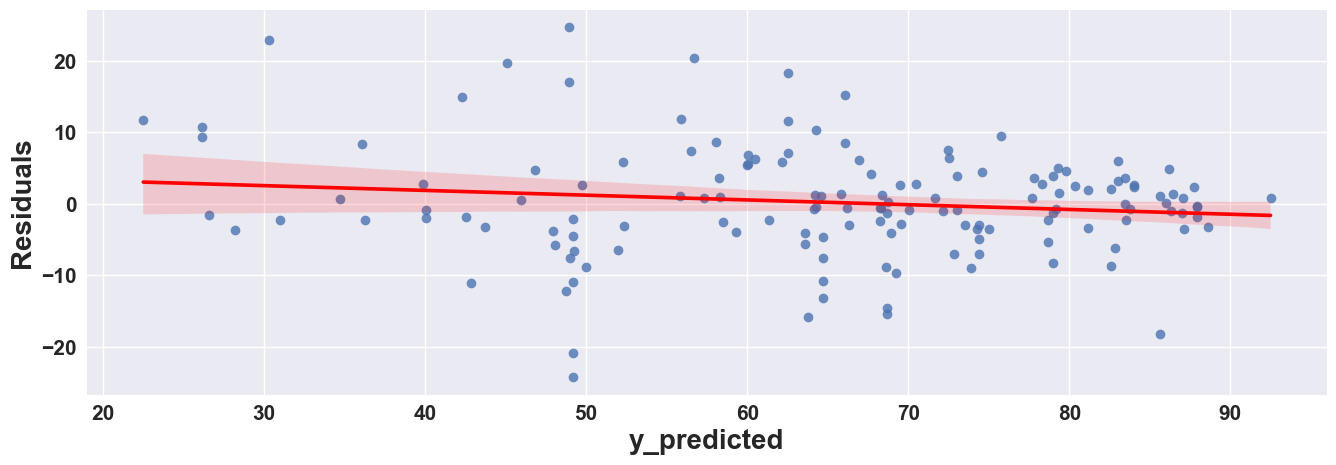

In [563]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_tree,y=y_test-y_pred_tree,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

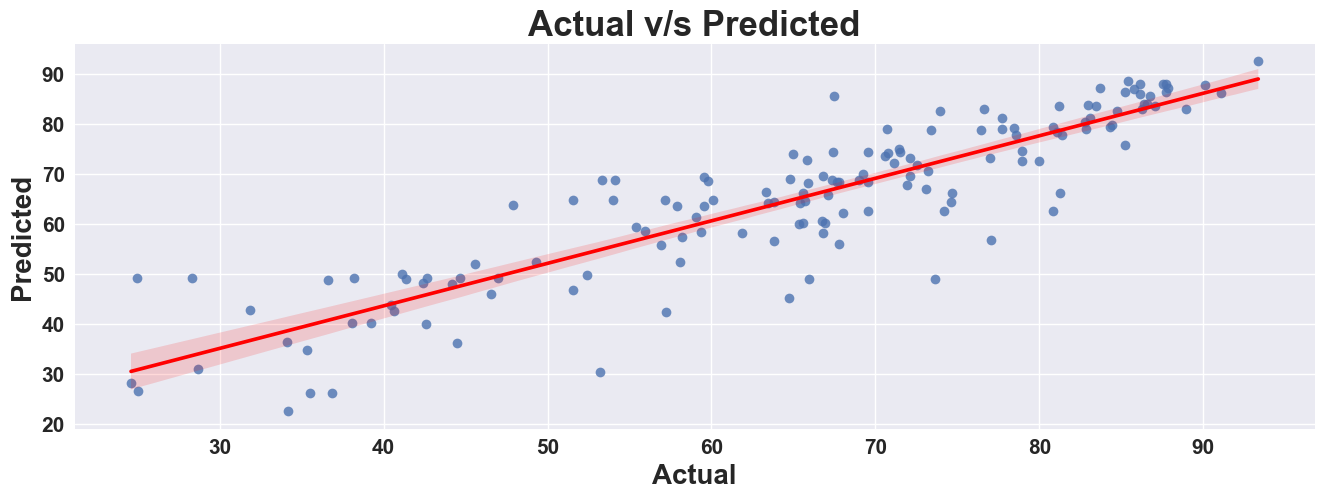

In [564]:
plot_scatter(y_pred_tree,y_test)

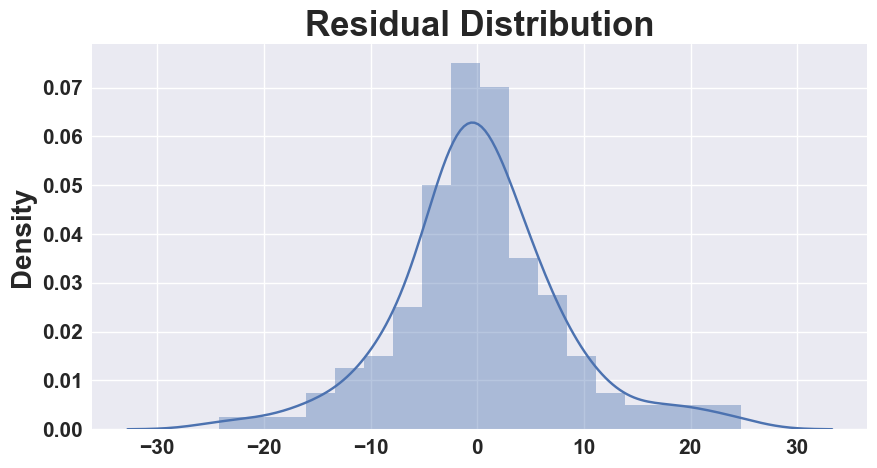

In [565]:
Residual_distPlot(y_pred_tree,y_test)

In [566]:
# Hyper parameters range intialization for tuning 
tree = DecisionTreeRegressor()
parameters=parameters = parameters = {
    'criterion': ['squared_error', 'absolute_error'],  
    'max_depth': [5, 7, 9],
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2']
}


In [567]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor(random_state=42)

tuning_model = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1
)

tuning_model.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [5, 7, ...], 'max_features': [None, 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [568]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "decision_tree(CV).pkl")

# Save the model
joblib.dump(tuning_model,file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\decision_tree(CV).pkl


In [569]:
print(f'The best parameter is {tuning_model.best_params_}')
print(f'The best negative mean squred error value is {tuning_model.best_score_}')

The best parameter is {'criterion': 'squared_error', 'max_depth': 7, 'max_features': None, 'splitter': 'best'}
The best negative mean squred error value is -63.80559433589138


Text(0.5, 0, 'Relative Importance')

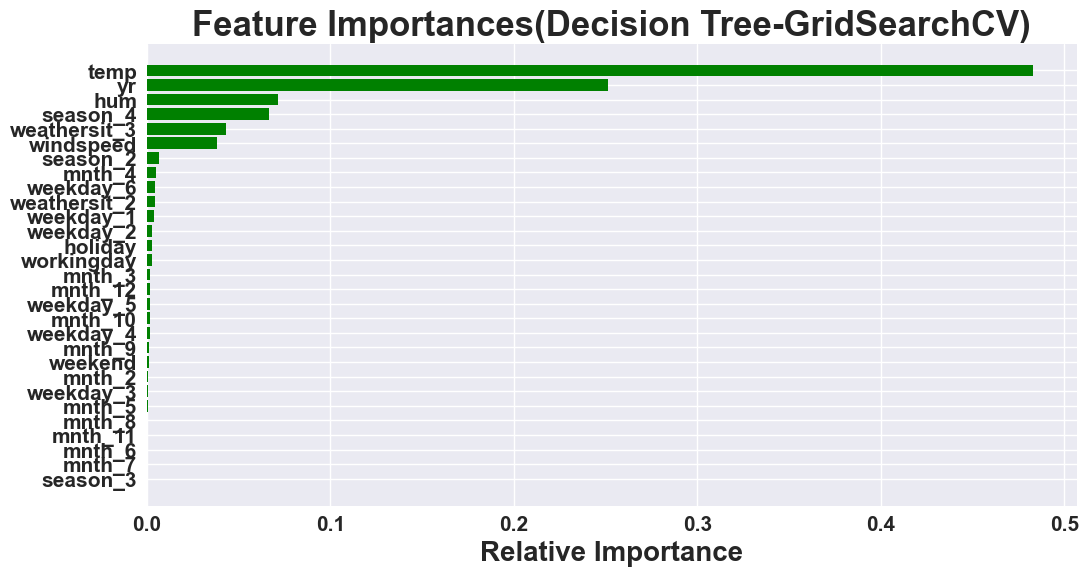

In [570]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

### Random Forest Regressor

In [571]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [572]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "randomforest.pkl")

# Save the model
joblib.dump(rf,file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\randomforest.pkl


In [573]:
rf.score(X_test,y_test)

0.8648597378846782

In [574]:
y_pred_train = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

In [575]:
MAE = mean_absolute_error(y_test,y_pred_rf)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred_rf)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred_rf)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.298271961047705.
The Mean Squred Error(MSE) is 38.387413717483085.
The Root Mean Squared Error(RMSE) is 6.195757719398257.
The R2 Score is 0.8648597378846782.
Adjusted R2 is 0.8313634335996839.


In [576]:
test_dict = {'Model':"Random Forest Regressor",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [577]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8595,40.3112,6.3491,0.8581,0.8229
1,Ridge(GridsearchCv Tunned),4.8543,40.1660,6.3377,0.8586,0.8235
2,ElasticNet(GridSearchCV-Tunned),4.8543,40.1660,6.3377,0.8586,0.8236
3,Decision Tree Regressor(GridsearchCV),5.5534,59.7127,7.7274,0.7898,0.7377
4,Random Forest Regressor,4.2983,38.3874,6.1958,0.8649,0.8314


### GridSearchCV On Random Forest

In [578]:
param = {'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

In [579]:
rf_reg = RandomForestRegressor()
rf_tuning = GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(X_train,y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [3, 4, ...], 'n_estimators': [25, 50, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,80


In [580]:
print(f'The best parameter is {rf_tuning.best_params_}')
print(f'The best negative mean squred error value is {rf_tuning.best_score_}')

The best parameter is {'max_depth': 9, 'n_estimators': 80}
The best negative mean squred error value is -40.92324499735089


In [581]:
rf_rg = RandomForestRegressor(max_depth= 9, n_estimators= 80)
rf_rg.fit(X_train,y_train)

,n_estimators,80
,criterion,'squared_error'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [582]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "randomforest(CV).pkl")

# Save the model
joblib.dump(rf_rg,file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\randomforest(CV).pkl


In [583]:
rf_rg.score(X_test,y_test)

0.8598043799938657

In [584]:
y_pred_train = rf_rg.predict(X_train)
y_pred_rf_rg = rf_rg.predict(X_test)

In [585]:
MAE = mean_absolute_error(y_test,y_pred_rf_rg)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred_rf_rg)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred_rf_rg)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_rf_rg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.4851513530337925.
The Mean Squred Error(MSE) is 39.82341888579451.
The Root Mean Squared Error(RMSE) is 6.310579916758404.
The R2 Score is 0.8598043799938657.
Adjusted R2 is 0.8250550382829436.


In [586]:
test_dict = {'Model':"Random Forest Regressor(GridsearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [587]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8595,40.3112,6.3491,0.8581,0.8229
1,Ridge(GridsearchCv Tunned),4.8543,40.1660,6.3377,0.8586,0.8235
2,ElasticNet(GridSearchCV-Tunned),4.8543,40.1660,6.3377,0.8586,0.8236
3,Decision Tree Regressor(GridsearchCV),5.5534,59.7127,7.7274,0.7898,0.7377
4,Random Forest Regressor,4.2983,38.3874,6.1958,0.8649,0.8314
5,Random Forest Regressor(GridsearchCV),4.4852,39.8234,6.3106,0.8598,0.8251


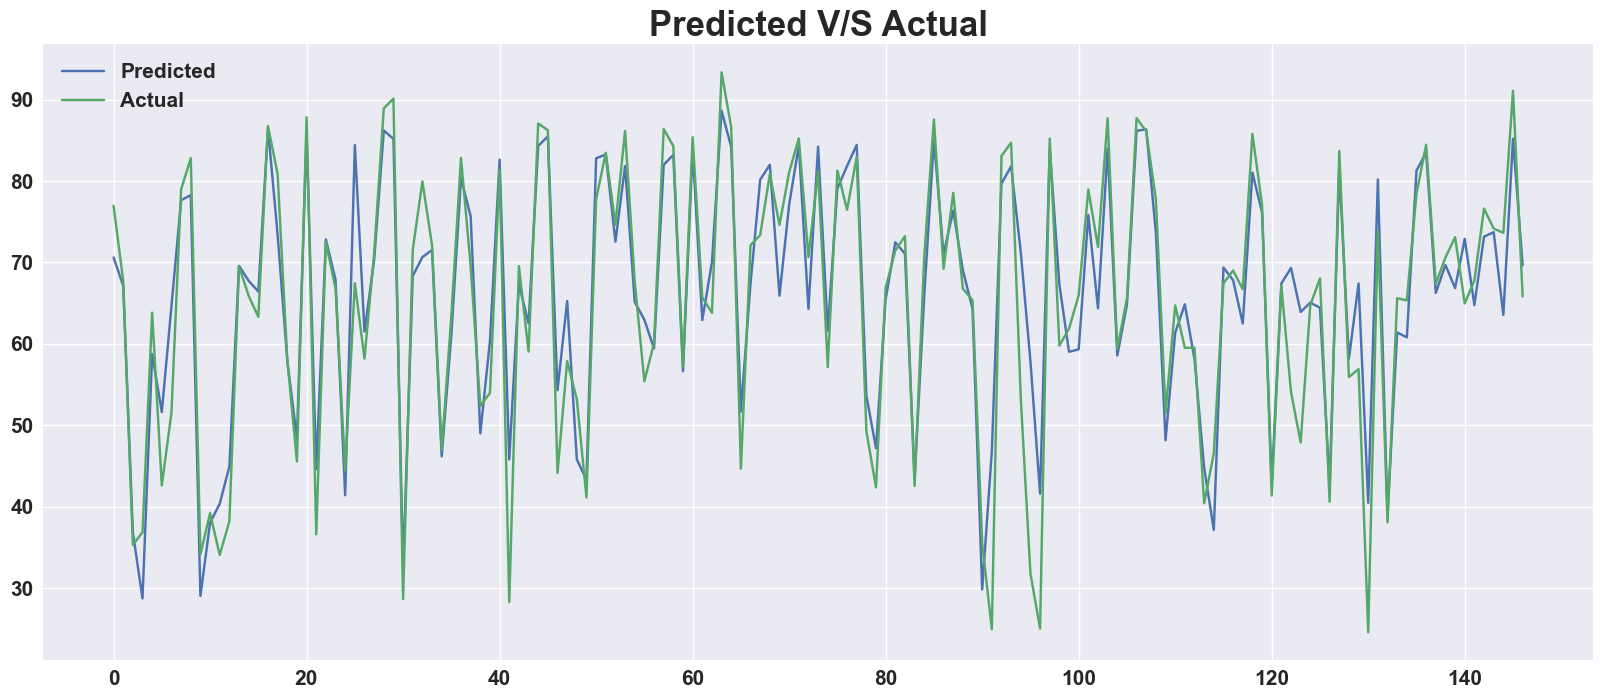

In [588]:
plot_Pred_vs_actual(y_pred_rf_rg,y_test)

Text(0.5, 0, 'y_predicted')

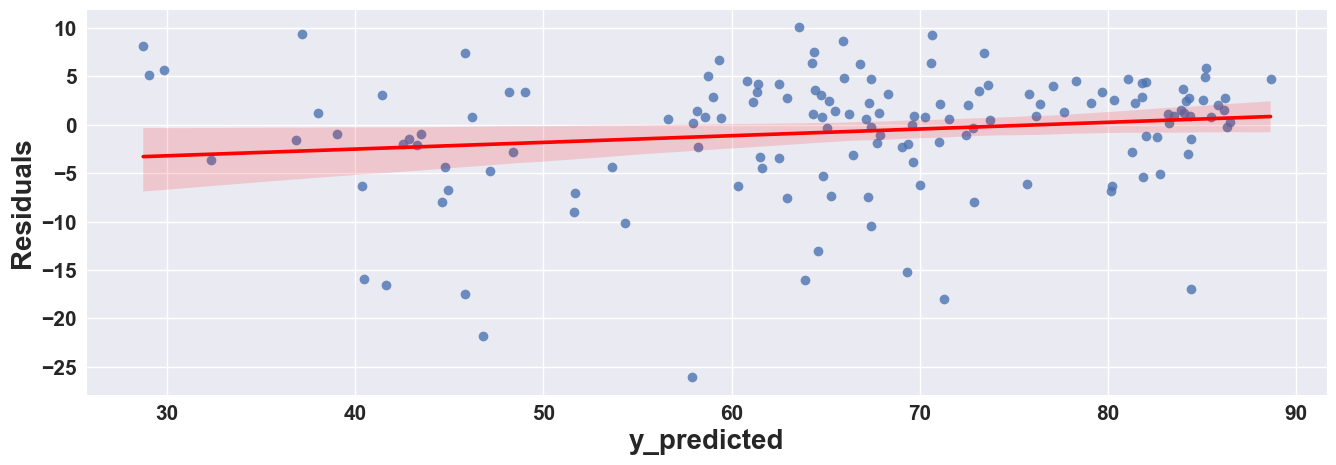

In [589]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_rf_rg,y=y_test-y_pred_rf_rg,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

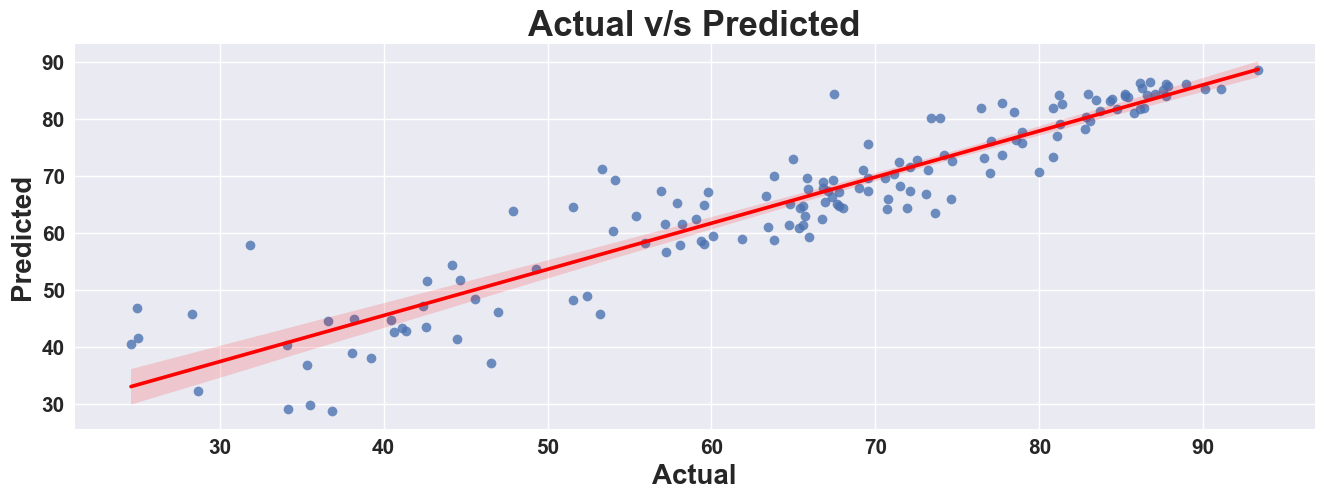

In [590]:
plot_scatter(y_pred_rf_rg,y_test)

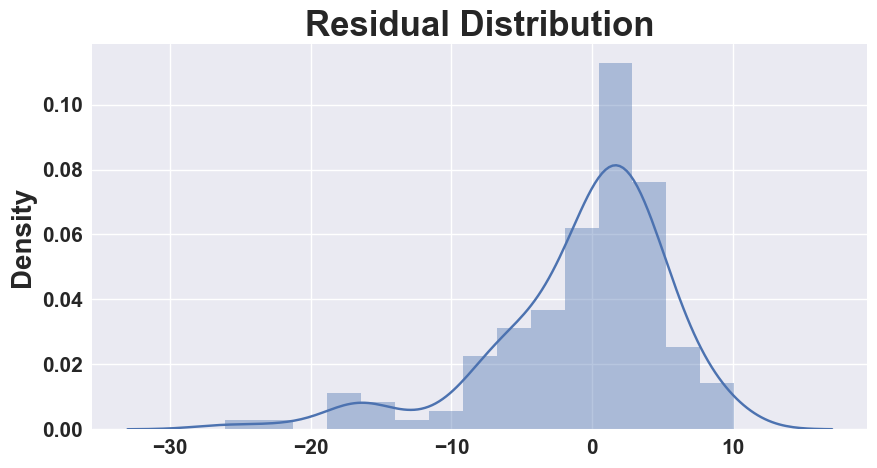

In [591]:
Residual_distPlot(y_pred_rf_rg,y_test)

Text(0.5, 0, 'Relative Importance')

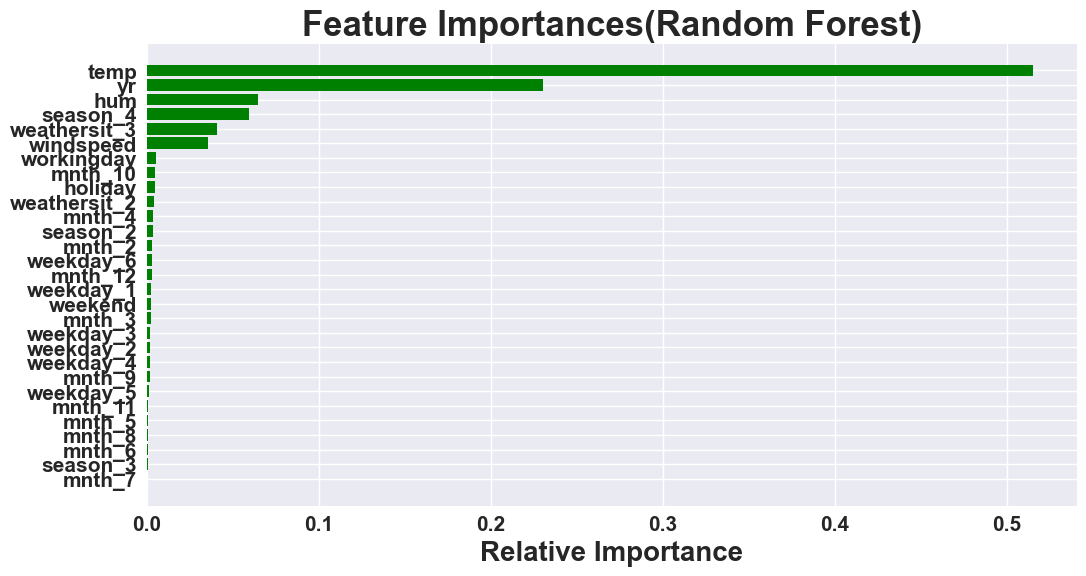

In [592]:
imp_variables=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

### Gradient Boosting

In [593]:
gradboo_reg = GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [594]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "gradient_boost.pkl")

# Save the model
joblib.dump(gradboo_reg,file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\gradient_boost.pkl


In [595]:
gradboo_reg.score(X_test,y_test)

0.8620211143327261

In [596]:
y_pred_train = gradboo_reg.predict(X_train)
y_pred_grad = gradboo_reg.predict(X_test)

In [597]:
MAE = mean_absolute_error(y_test,y_pred_grad)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred_grad)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred_grad)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_grad))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.379162892269925.
The Mean Squred Error(MSE) is 39.19374200907683.
The Root Mean Squared Error(RMSE) is 6.260490556583951.
The R2 Score is 0.8620211143327261.
Adjusted R2 is 0.8278212195946839.


In [598]:
test_dict = {'Model':"Gardient boosting Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [599]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df


,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8595,40.3112,6.3491,0.8581,0.8229
1,Ridge(GridsearchCv Tunned),4.8543,40.1660,6.3377,0.8586,0.8235
2,ElasticNet(GridSearchCV-Tunned),4.8543,40.1660,6.3377,0.8586,0.8236
3,Decision Tree Regressor(GridsearchCV),5.5534,59.7127,7.7274,0.7898,0.7377
4,Random Forest Regressor,4.2983,38.3874,6.1958,0.8649,0.8314
5,Random Forest Regressor(GridsearchCV),4.4852,39.8234,6.3106,0.8598,0.8251
6,Gardient boosting Regression,4.3792,39.1937,6.2605,0.8620,0.8278


### GridSearchCV on Gradient Boosting Regressor

In [600]:
gbr = GradientBoostingRegressor()

In [601]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [50,80,100,150],
               'max_depth'    : [4,6,8,10]}

In [602]:
grad_boo_tuning = GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
grad_boo_tuning.fit(X_train,y_train)

,estimator,GradientBoostingRegressor()
,param_grid,"{'learning_rate': [0.01, 0.02, ...], 'max_depth': [4, 6, ...], 'n_estimators': [50, 80, ...], 'subsample': [0.9, 0.5, ...]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [603]:
print(f'The best parameter is {grad_boo_tuning.best_params_}')
print(f'The best negative mean squred error value is {grad_boo_tuning.best_score_}')

The best parameter is {'learning_rate': 0.04, 'max_depth': 10, 'n_estimators': 150, 'subsample': 0.2}
The best negative mean squred error value is 0.8639390643252223


In [604]:
grad_tuned = GradientBoostingRegressor(learning_rate=0.04,max_depth=10,n_estimators=150,subsample=0.5)
grad_tuned.fit(X_train,y_train)

,loss,'squared_error'
,learning_rate,0.04
,n_estimators,150
,subsample,0.5
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,10
,min_impurity_decrease,0.0
,init,None


In [605]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "gradient_boost(CV).pkl")

# Save the model
joblib.dump(grad_tuned,file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\gradient_boost(CV).pkl


In [606]:
grad_tuned.score(X_test,y_test)

0.877171506501285

In [607]:
y_pred_train = grad_tuned.predict(X_train)
y_pred_tuned = grad_tuned.predict(X_test)

In [608]:
MAE = mean_absolute_error(y_test,y_pred_tuned)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred_tuned)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred_tuned)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_tuned))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.123908760169447.
The Mean Squred Error(MSE) is 34.89018093073372.
The Root Mean Squared Error(RMSE) is 5.9067910857532215.
The R2 Score is 0.877171506501285.
Adjusted R2 is 0.8467268371725436.


In [609]:
test_dict = {'Model':"Gradient Boosting Regression(GridSearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [610]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df


,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8595,40.3112,6.3491,0.8581,0.8229
1,Ridge(GridsearchCv Tunned),4.8543,40.1660,6.3377,0.8586,0.8235
2,ElasticNet(GridSearchCV-Tunned),4.8543,40.1660,6.3377,0.8586,0.8236
3,Decision Tree Regressor(GridsearchCV),5.5534,59.7127,7.7274,0.7898,0.7377
4,Random Forest Regressor,4.2983,38.3874,6.1958,0.8649,0.8314
5,Random Forest Regressor(GridsearchCV),4.4852,39.8234,6.3106,0.8598,0.8251
6,Gardient boosting Regression,4.3792,39.1937,6.2605,0.8620,0.8278
7,Gradient Boosting Regression(GridSearchCV),4.1239,34.8902,5.9068,0.8772,0.8467


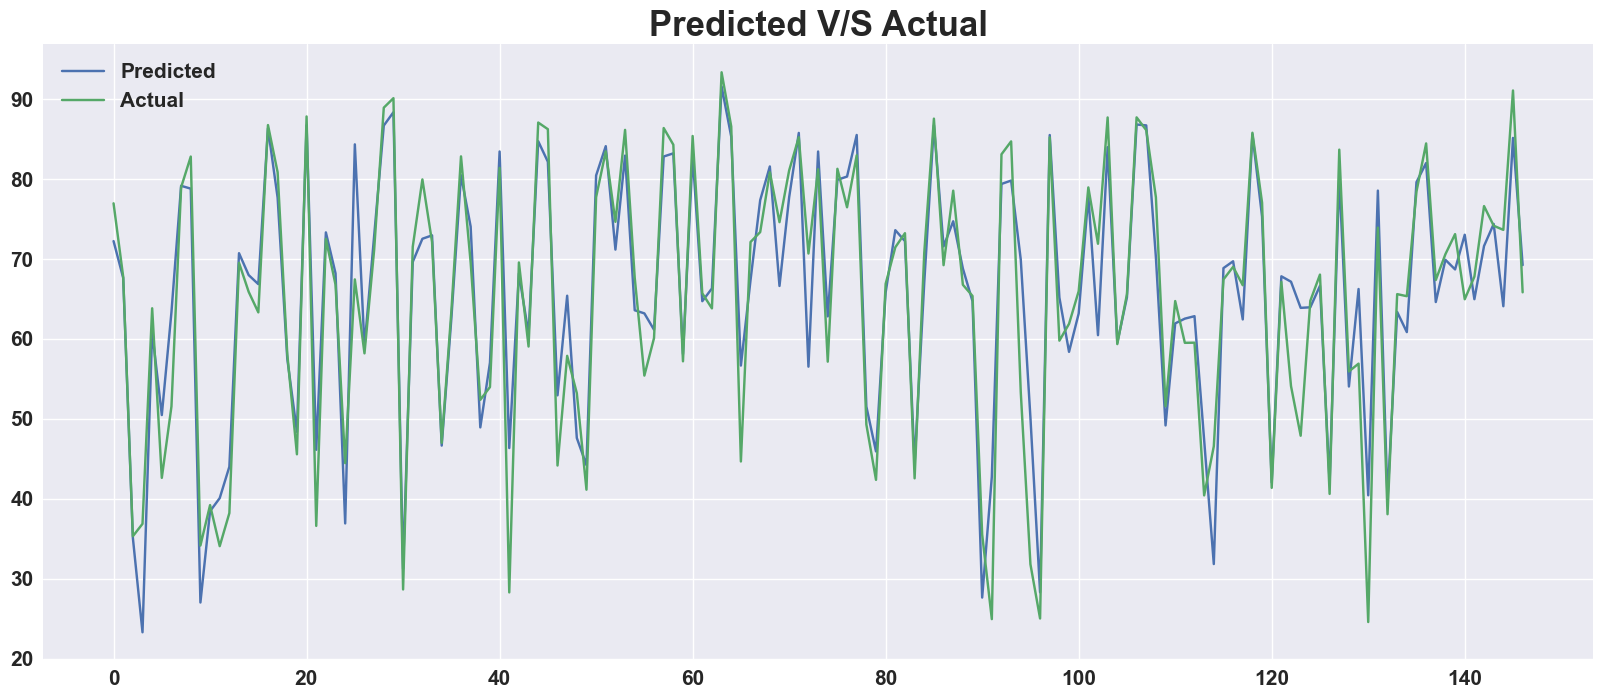

In [611]:
plot_Pred_vs_actual(y_pred_tuned,y_test)

Text(0.5, 0, 'y_predicted')

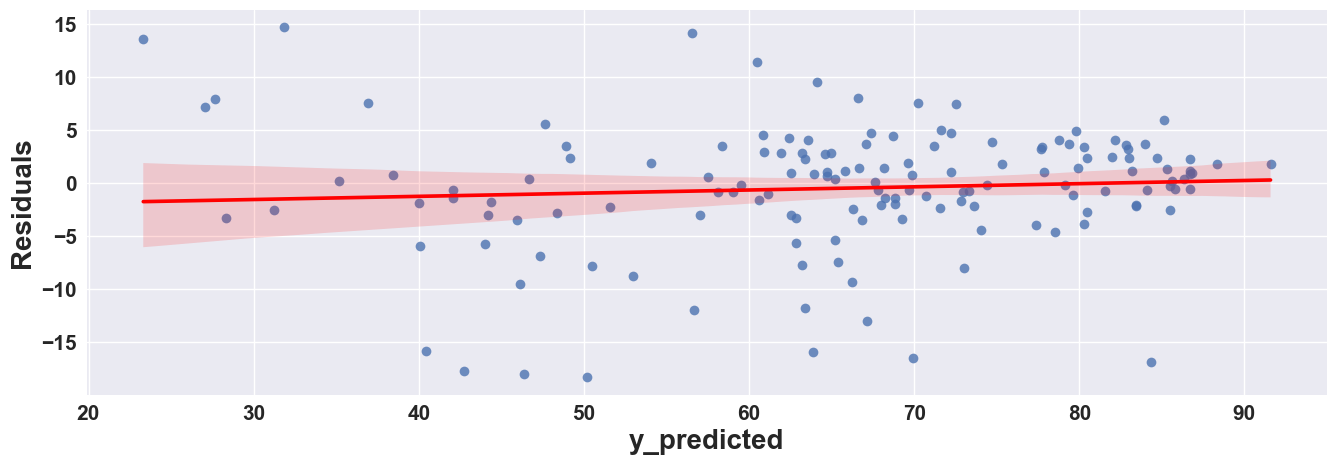

In [612]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_tuned,y=y_test-y_pred_tuned,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

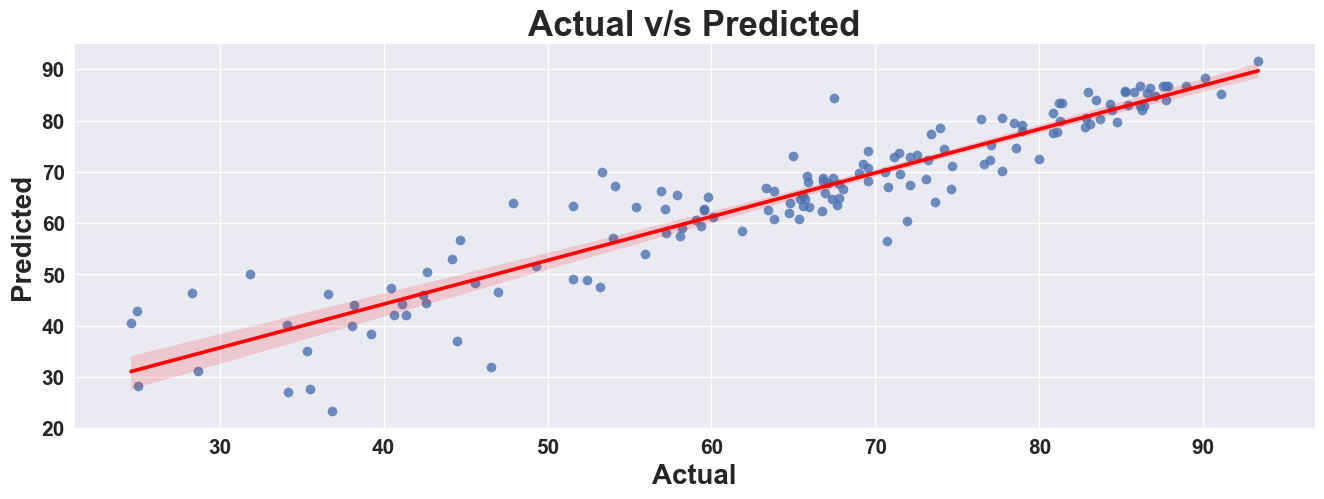

In [613]:
plot_scatter(y_pred_tuned,y_test)

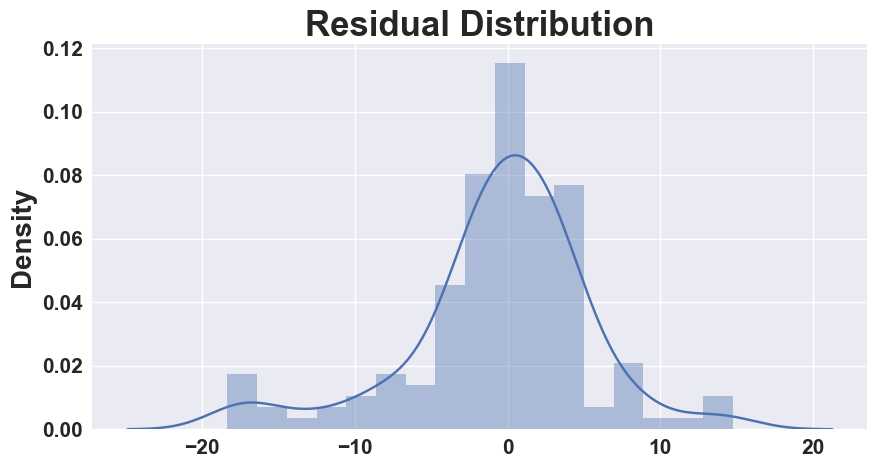

In [614]:
Residual_distPlot(y_pred_tuned,y_test)

Text(0.5, 0, 'Relative Importance')

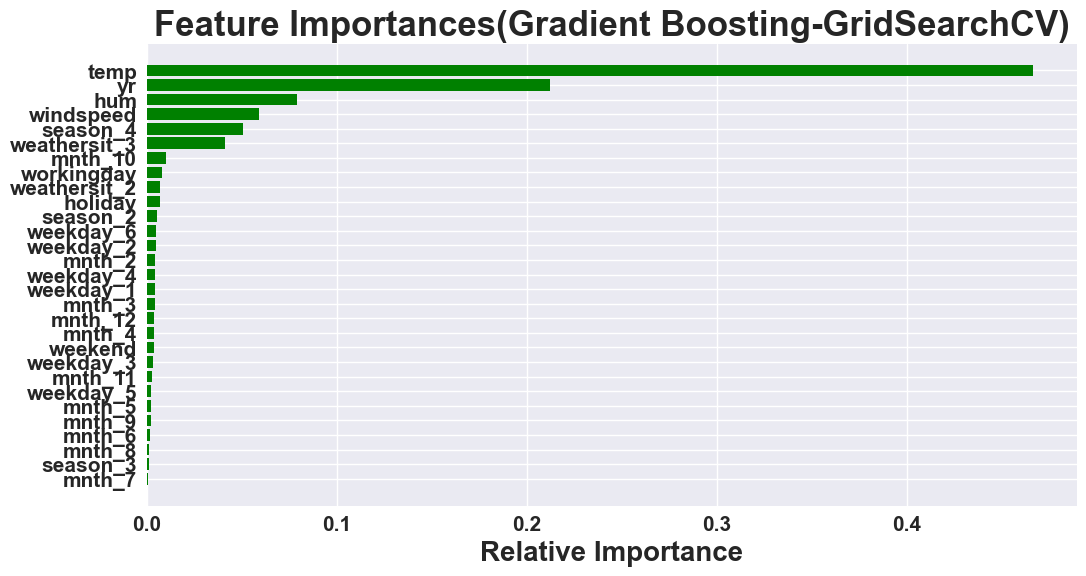

In [615]:
imp_variables=X.columns
importances = grad_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

### Final Comaparison : -

In [616]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8595,40.3112,6.3491,0.8581,0.8229
1,Ridge(GridsearchCv Tunned),4.8543,40.1660,6.3377,0.8586,0.8235
2,ElasticNet(GridSearchCV-Tunned),4.8543,40.1660,6.3377,0.8586,0.8236
3,Decision Tree Regressor(GridsearchCV),5.5534,59.7127,7.7274,0.7898,0.7377
4,Random Forest Regressor,4.2983,38.3874,6.1958,0.8649,0.8314
5,Random Forest Regressor(GridsearchCV),4.4852,39.8234,6.3106,0.8598,0.8251
6,Gardient boosting Regression,4.3792,39.1937,6.2605,0.8620,0.8278
7,Gradient Boosting Regression(GridSearchCV),4.1239,34.8902,5.9068,0.8772,0.8467
8,Gradient Boosting Regression(GridSearchCV),4.1239,34.8902,5.9068,0.8772,0.8467
